# Implementation of keypoint matching model
Now that we believe that keypoint-matching could be a good solution for our problem,
I have implemented (in `kpm_model.py`) a self-contained model class for keypoint-matching.

To test the class, let's initialise an instance of the class with the SIFT detector, and
train it on the KIA logo:

In [1]:
import kpm_model as model
import cv2, os

# Initialise model
SIFT = cv2.xfeatures2d.SIFT_create()
SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)

# Train on KIA logo
logo_name = "Kia"
logo_filename = os.path.join("data", "logos", logo_name.lower() + '.jpg')
logo_image = cv2.imread(logo_filename)
SIFTMatcher.add_template(logo_name, logo_image)

Now let's verify that the model works as in the feasibility study by running it over our test image.

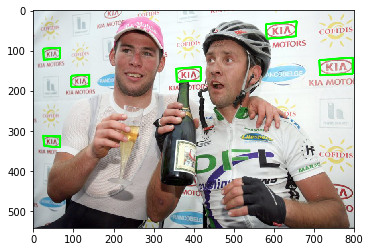

In [3]:
from matplotlib import pyplot as plt

# Read an example test image
kia_test_filename = "data/images/07596671.jpg"
kia_test_image = cv2.imread(kia_test_filename)

detected_logos = SIFTMatcher.detect_objects(kia_test_image)
annotated_image = model.annotate_image_with_objects(kia_test_image, detected_logos)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()

## Inverse-brightness images**
The keypoint-matching typically fails in the case of inverse-brightness images. Consider the case of the following image, where the KIA logo is white-on-red rather than red-on-white in the template.

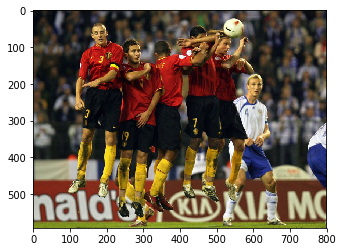

In [7]:
inverse_test_filename = "data/images/07645729.jpg"
inverse_test_image = cv2.imread(inverse_test_filename)
plt.imshow(cv2.cvtColor(inverse_test_image, cv2.COLOR_BGR2RGB))
plt.show()

This can be trivially (if not very efficiently) handled by having the model use both the template image and it's brightness-inverse in the keypoint-matching. In this way, matches can also be achieved to the above image.

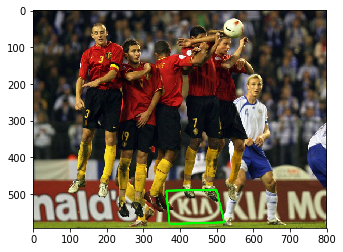

In [8]:
detected_logos = SIFTMatcher.detect_objects(inverse_test_image)
annotated_image = model.annotate_image_with_objects(inverse_test_image, detected_logos)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()